In [18]:
import requests

response = requests.get('http://apis.data.go.kr/3450000/naMovementOrgService/getNaMovementOrg',
                       params={'serviceKey' : 'Xr8lWkYKCl8Cc5n5rfc6XUhXbIW0nsuwR/SjwrucjY2173kD91kNTCx+PNYcqbI49Qn7BNuZN3uwU78EvOJ4lQ==',
                              'currentPage' : '1',
                              'perPage' : '10',
                              'GRP_NM' : '대구북구새마을회'}
                       )

In [19]:
print(response.status_code)

200


In [61]:
response.links

{}

In [29]:
print(len(response.json()))

2


In [44]:
print(response.json)

<bound method Response.json of <Response [200]>>


In [64]:
response.json()['body'][0]

{'GRP_NM': '대구북구새마을회',
 'LOCPLC': '대구광역시 북구 원대로 50',
 'OFFM_TELNO': '053-352-1622',
 'BSNS_GOAL': "상생과 협력으로 만들어가는 '함께 잘사는 공동체",
 'INTNET_SITE': 'https://www.saemaul.or.kr/index.php'}

In [72]:
response.headers

{'Set-Cookie': 'JSESSIONID=D6B76936F386EE949AD8DC40C12829E4; Path=/3450000/naMovementOrgService; Secure; HttpOnly; Domain=apis.data.go.kr', 'X-FRAME-OPTIONS': 'SAMEORIGIN', 'X-CONTENT-TYPE-OPTIONS': 'nosniff', 'X-XSS-Protection': '1;mode=block', 'Content-Security-Policy': "script-src 'self' 'unsafe-eval' 'unsafe-inline' ; script-src-elem 'self' 'unsafe-inline' https://*; img-src 'self' data:; style-src 'self' 'unsafe-inline' https://* ; connect-src 'self'; child-src 'unsafe-inline'; object-src 'self'", 'Cache-Control': 'no-store', 'Content-Language': 'ko-KR', 'Access-Control-Allow-Origin': '*', 'Content-Encoding': 'gzip', 'Content-Type': 'application/json;charset=UTF-8', 'Content-Length': '341', 'Date': 'Tue, 28 Feb 2023 02:36:17 GMT', 'Server': 'NIA API Server'}

In [66]:
response.headers['Content-Type']

'application/json;charset=UTF-8'

In [69]:
response.json().keys()

dict_keys(['body', 'header'])

In [70]:
len(response.json()['header'])

5

# Web Crawling VS Web Scraping

### robots.txt 분석하기

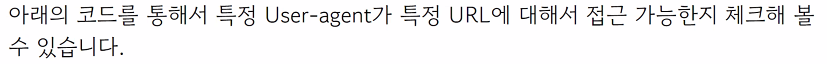

In [1]:
import urllib.robotparser
rp = urllib.robotparser.RobotFileParser()
rp.set_url("https://www.reuters.com/robots.txt")
rp.read()

In [2]:
# 특정 User-agent가 url에 접근 가능한지 확인한다.
rp.can_fetch(useragent="*", url="https://www.reuters.com/sitemap.xml")

True

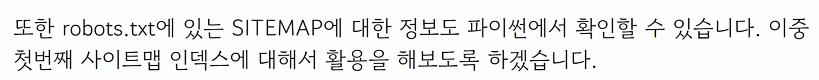

In [3]:
sitemaps = rp.site_maps()
sitemaps

['https://www.reuters.com/arc/outboundfeeds/sitemap-index/?outputType=xml',
 'https://www.reuters.com/arc/outboundfeeds/news-sitemap-index/?outputType=xml',
 'https://www.reuters.com/sitemap_video_index.xml',
 'https://www.reuters.com/brandfeature/sitemap']

### 사이트 맵을 활용한 웹 크롤러 작성하기

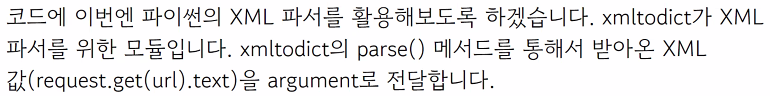

In [18]:
!pip install xmltodict

import xmltodict
import requests

url = sitemaps[0]
sub_sitemaps = xmltodict.parse(requests.get(url).text)

In [19]:
sub_sitemaps

{'sitemapindex': {'@xmlns': 'http://www.sitemaps.org/schemas/sitemap/0.9',
  'sitemap': [{'loc': 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml',
    'lastmod': '2023-02-28T06:45:48.420Z'},
   {'loc': 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=100',
    'lastmod': '2023-02-28T06:45:48.420Z'},
   {'loc': 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=200',
    'lastmod': '2023-02-28T06:45:48.420Z'},
   {'loc': 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=300',
    'lastmod': '2023-02-28T06:45:48.420Z'},
   {'loc': 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=400',
    'lastmod': '2023-02-28T06:45:48.420Z'},
   {'loc': 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=500',
    'lastmod': '2023-02-28T06:45:48.420Z'},
   {'loc': 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=600',
    'lastmod': '2023-02-28T06:45:48.

In [6]:
# sitemap url들을 확보
sub_sitemaps_urls = [sitemap['loc'] for sitemap in sub_sitemaps['sitemapindex']['sitemap']]

In [17]:
display(sub_sitemaps_urls)

['https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=100',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=200',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=300',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=400',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=500',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=600',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=700',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=800',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=900',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=1000',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=1100',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?output

In [9]:
response = requests.get(sub_sitemaps_urls[0])

In [10]:
urls = xmltodict.parse(response.text)

In [14]:
urls

{'urlset': {'@xmlns': 'http://www.sitemaps.org/schemas/sitemap/0.9',
  '@xmlns:image': 'http://www.google.com/schemas/sitemap-image/1.1',
  'url': [{'loc': 'https://www.reuters.com/markets/europe/global-markets-view-europe-2023-02-28/',
    'lastmod': '2023-02-28T06:30:51.395Z',
    'image:image': {'image:loc': 'https://www.reuters.com/resizer/VAhiE2wIqGF42htLlOrAm5QKpbA=/cloudfront-us-east-2.images.arcpublishing.com/reuters/HJX63HRYZNJLJGAQPOSEHQV45M.jpg',
     'image:caption': 'The German share price index DAX graph is pictured at the stock exchange in Frankfurt, Germany, February 27, 2023.    REUTERS/Staff'}},
   {'loc': 'https://www.reuters.com/business/retail-consumer/home-zara-fast-slow-fashion-collide-2023-02-28/',
    'lastmod': '2023-02-28T06:29:10.080Z',
    'image:image': {'image:loc': 'https://www.reuters.com/resizer/bJSj22xxE8PlHfv9BLCLGhzVVyw=/cloudfront-us-east-2.images.arcpublishing.com/reuters/E4WVOANN2FJD3GHH354WDLWAJY.jpg',
     'image:caption': 'Marian Fernandez, 56

In [32]:
news_urls = [url['loc'] for url in urls['urlset']['url']]

In [33]:
display(news_urls)

['https://www.reuters.com/markets/europe/global-markets-view-europe-2023-02-28/',
 'https://www.reuters.com/business/retail-consumer/home-zara-fast-slow-fashion-collide-2023-02-28/',
 'https://www.reuters.com/lifestyle/sports/england-captain-stokes-has-no-regrets-over-follow-on-2023-02-28/',
 'https://www.reuters.com/markets/asia/indias-adani-plans-repay-up-790-mln-share-backed-loans-by-march-sources-2023-02-28/',
 'https://www.reuters.com/lifestyle/sports/smith-says-australia-batsmen-will-ditch-risky-tempo-third-test-2023-02-28/',
 'https://www.reuters.com/technology/cryptoverse-bitcoin-moves-towards-satoshis-payment-dream-2023-02-28/',
 'https://www.reuters.com/markets/europe/ecb-has-started-win-inflation-fight-lane-says-2023-02-28/',
 'https://www.reuters.com/markets/rates-bonds/banks-pile-into-euro-zone-bond-sales-rates-shoot-up-2023-02-28/',
 'https://www.reuters.com/business/adecco-sees-signs-hiring-slowdown-start-2023-2023-02-28/',
 'https://www.reuters.com/world/us/tennessee-me

### URL 데이터 다운로드 하기

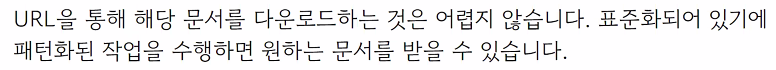

In [36]:
%%time
# session 추상화
session = requests.Session()

# 앞의 5개 링크만 가져와본다.
for url in news_urls[:5]:
    file = url.split("/")[-2] + '.html'
    
    response = session.get(url)
    if response.ok:
        with open("datas/"+file, "wb") as f:
            f.write(response.text.encode('utf-8'))
    else:
        print("error with URL : {url}")

Wall time: 1.57 s


### 파일 사용하기

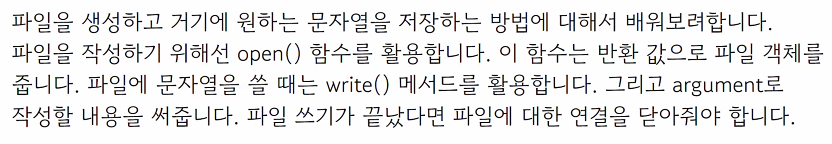

In [40]:
# filename
file = open('filename.txt', 'w', encoding="utf-8")
# 파일 객체의 write()메서드를 통해 문자열을 파일에 쓸 수 있습니다.
file.write('파일에 작성할 문자열')
# 파일에 대한 처리가 끝났다면 반드시 파일을 닫아줘야합니다.
file.close()

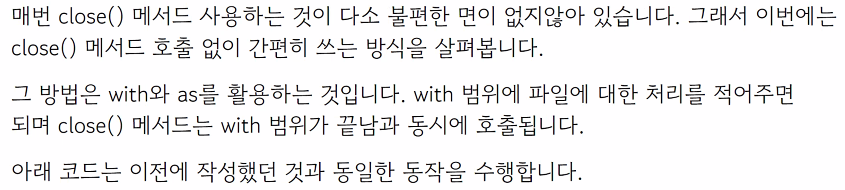

In [44]:
# close에 대한 처리 없이 간편히 쓰려면 with를 활용할 수 있습니다.
# 아래 코드는 이전에 작성했던 것과 동일한 동작을 수행합니다.
with open('filename.txt', 'w') as file:
    file.write('파일에 작성할 문자열')

In [45]:
with open('filename.txt', 'r') as file:
    print(file.read())

파일에 작성할 문자열


### 파일 이름 가져오기

In [46]:
import os
path = "./datas/"
files = [path + file for file in os.listdir(path)]
files

['./datas/.ipynb_checkpoints',
 './datas/england-captain-stokes-has-no-regrets-over-follow-on-2023-02-28.html',
 './datas/global-markets-view-europe-2023-02-28.html',
 './datas/home-zara-fast-slow-fashion-collide-2023-02-28.html',
 './datas/indias-adani-plans-repay-up-790-mln-share-backed-loans-by-march-sources-2023-02-28.html',
 './datas/smith-says-australia-batsmen-will-ditch-risky-tempo-third-test-2023-02-28.html']

### HTML 파서를 사용한 데이터 추출

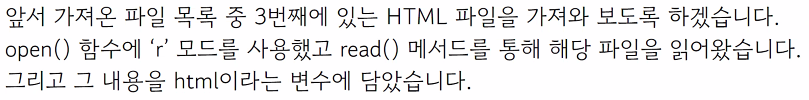

In [65]:
with open(files[2], "r", encoding="utf-8") as f:
    html = f.read()

### BeautifulSoup

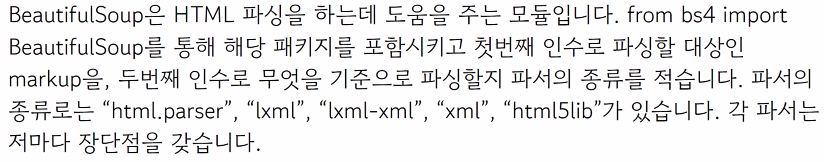

In [74]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')
title = soup.select_one("#main-content > article > div.article__main__33WV2 > div.article__content__6hMn9 > header > div > div > h1")
print(title.text)

Morning Bid: Market mood downbeat ahead of raft of data


In [90]:
soup.select_one("#main-content > article > div.article__main__33WV2 > div.article__content__6hMn9 > div > div > div.article-body__content__17Yit.paywall-article > p:nth-child(3)").text

"The overarching downbeat mood among investors shows no signs of improving as markets become increasingly wary of a further rise in borrowing costs.Although U.S. markets took a breather and rose on Monday, they ended well below the day's highs and Asian markets were back in the red on Tuesday after gaining in early trade."

### URL추출

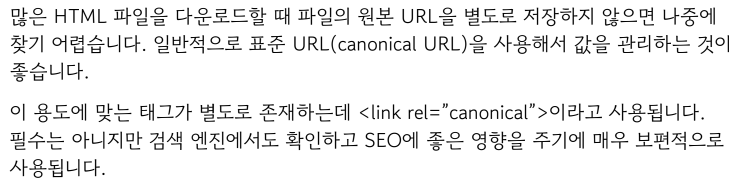

In [95]:
# 표준(Standard) URL(=canonical URL)
soup.find("link",{"rel": "canonical"})["href"]

'https://www.reuters.com/markets/europe/global-markets-view-europe-2023-02-28/'